<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_2324_w6_lab_prep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

In [16]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv',
    index_col=0
)

In [17]:
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
X, y = adv.drop(columns='sales'), adv['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [20]:
print(export_text(dtr, feature_names=X.columns.to_list()))

|--- TV <= 130.25
|   |--- value: [9.95]
|--- TV >  130.25
|   |--- value: [17.21]



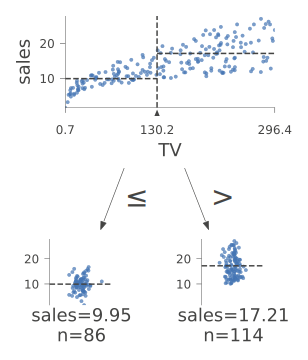

In [21]:
dtv = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)

In [22]:
mean_absolute_error(y_test, dtr.predict(X_test)), mean_absolute_error(y_train, dtr.predict(X_train))

(3.270034270813933, 3.0016057614701683)

In [36]:
# Define parameter grid
param_grid = {
    'max_depth': [1,2, 3, 4, 8, 10],
    'min_samples_leaf': [ 10, 20, 30 ]
}

In [37]:
# List the combinations
list(ParameterGrid(param_grid))

[{'max_depth': 1, 'min_samples_leaf': 10},
 {'max_depth': 1, 'min_samples_leaf': 20},
 {'max_depth': 1, 'min_samples_leaf': 30},
 {'max_depth': 2, 'min_samples_leaf': 10},
 {'max_depth': 2, 'min_samples_leaf': 20},
 {'max_depth': 2, 'min_samples_leaf': 30},
 {'max_depth': 3, 'min_samples_leaf': 10},
 {'max_depth': 3, 'min_samples_leaf': 20},
 {'max_depth': 3, 'min_samples_leaf': 30},
 {'max_depth': 4, 'min_samples_leaf': 10},
 {'max_depth': 4, 'min_samples_leaf': 20},
 {'max_depth': 4, 'min_samples_leaf': 30},
 {'max_depth': 8, 'min_samples_leaf': 10},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 8, 'min_samples_leaf': 30},
 {'max_depth': 10, 'min_samples_leaf': 10},
 {'max_depth': 10, 'min_samples_leaf': 20},
 {'max_depth': 10, 'min_samples_leaf': 30}]

In [38]:
 # Instantiate gridsearch
reg = GridSearchCV(dtr, param_grid, return_train_score=True, scoring='neg_mean_absolute_error')


In [39]:
# Fit data
gs_results = reg.fit(X_train, y_train)

In [40]:
# convert to dataframe
gs_df = pd.DataFrame(gs_results.cv_results_)

gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [41]:
# select performance indices to display and convert negative values to positive
gs_df_s = gs_df[ [
    'param_max_depth', 'param_min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

gs_df_s.iloc[:, [2,4]] = gs_df_s.iloc[:, [2,4]].mul(-1)

gs_df_s



,param_max_depth,param_min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
12,8,10,1.016398,0.064713,1.394409,0.141761,1
15,10,10,1.016398,0.064713,1.394409,0.141761,2
9,4,10,1.027866,0.060173,1.408082,0.150693,3
6,3,10,1.182857,0.032331,1.631406,0.183641,4
7,3,20,1.727418,0.090847,1.926557,0.155067,5
10,4,20,1.727418,0.090847,1.926557,0.155067,5
16,10,20,1.727418,0.090847,1.926557,0.155067,7
13,8,20,1.727418,0.090847,1.926557,0.155067,7
4,2,20,1.779312,0.057986,1.951488,0.125586,9
3,2,10,1.687163,0.036613,1.956059,0.228578,10


In [42]:
 #select best model
gs_results.best_params_



{'max_depth': 8, 'min_samples_leaf': 10}

In [43]:
# ...and obtain the best model (the one fitted on that winning configuration)
gs_results.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

In [44]:
dtrb = gs_results.best_estimator_

print(
    mean_absolute_error(y_test, dtrb.predict(X_test)),
    mean_absolute_error(y_train, dtrb.predict(X_train))
)

1.4486497143379493 0.9767501835854775


|--- TV <= 130.25
|   |--- TV <= 33.30
|   |   |--- value: [6.81]
|   |--- TV >  33.30
|   |   |--- radio <= 27.10
|   |   |   |--- radio <= 13.30
|   |   |   |   |--- value: [9.79]
|   |   |   |--- radio >  13.30
|   |   |   |   |--- value: [11.21]
|   |   |--- radio >  27.10
|   |   |   |--- value: [13.09]
|--- TV >  130.25
|   |--- radio <= 26.85
|   |   |--- radio <= 9.70
|   |   |   |--- radio <= 3.80
|   |   |   |   |--- value: [11.40]
|   |   |   |--- radio >  3.80
|   |   |   |   |--- value: [12.42]
|   |   |--- radio >  9.70
|   |   |   |--- TV <= 190.80
|   |   |   |   |--- value: [14.27]
|   |   |   |--- TV >  190.80
|   |   |   |   |--- value: [15.85]
|   |--- radio >  26.85
|   |   |--- TV <= 210.75
|   |   |   |--- value: [18.74]
|   |   |--- TV >  210.75
|   |   |   |--- radio <= 35.30
|   |   |   |   |--- value: [19.89]
|   |   |   |--- radio >  35.30
|   |   |   |   |--- value: [23.71]



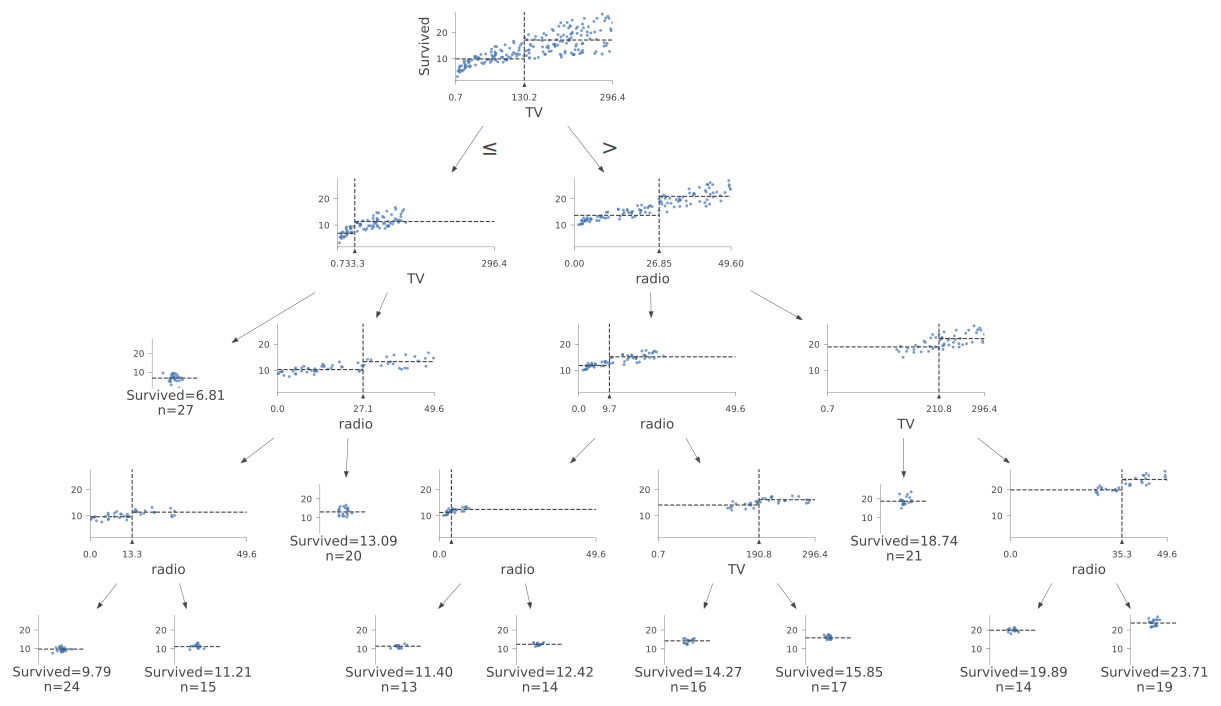

In [45]:
 # Visualize model

print(
    export_text(dtrb, feature_names=X.columns.to_list())
)
dtviz = dtreeviz.model(
    dtrb, X, y, target_name='Survived', feature_names=X.columns,
    class_names=["No", "Yes"]
)
dtviz.view(scale=1.5, fontname='sans-serif')

<Axes: xlabel='rank_test_score'>

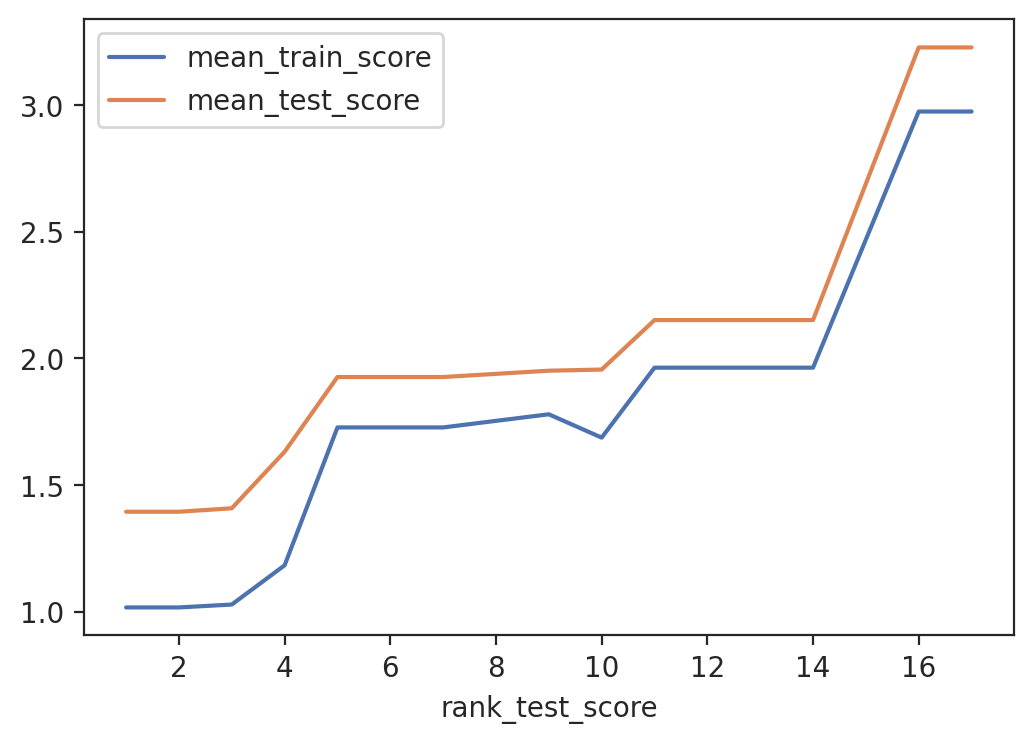

In [46]:


import matplotlib.pyplot as plt # Impot the relevant module


fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
gs_df_s.plot(x ='rank_test_score', y='mean_train_score', ax = ax)


# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)

gs_df_s.plot( x ='rank_test_score', y = 'mean_test_score', ax = ax,)